In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings, itertools
warnings.filterwarnings('ignore')
# you can either install the mpltools library or just comment out the next two lines
# (n.b. ggplot style is much more readable)
from mpltools import style
style.use('ggplot')

<h1>Read in data</h1>
<p>We're going to use a pandas dataframe to read in the csv file, and do some basic data exploration. The dataset we'll be using is admissions data describing applicants GPA, GRE score, and rank in school (1-4 for Freshman through Senior).  We'll start by reading in the data, and then looking at a few different views of it.</p>

In [2]:
df = pd.read_csv("./data/grad.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


<h1>Plot the data</h1>
<p>We always want to look at all or a porition of the data to make sure that no data cleansing needs to occure.  Create some distributions to view the data.  Before you move on, try to ask yourself the following question:

given the distributions I see in the data, what do I think a reasonable accuracy is?
</p>

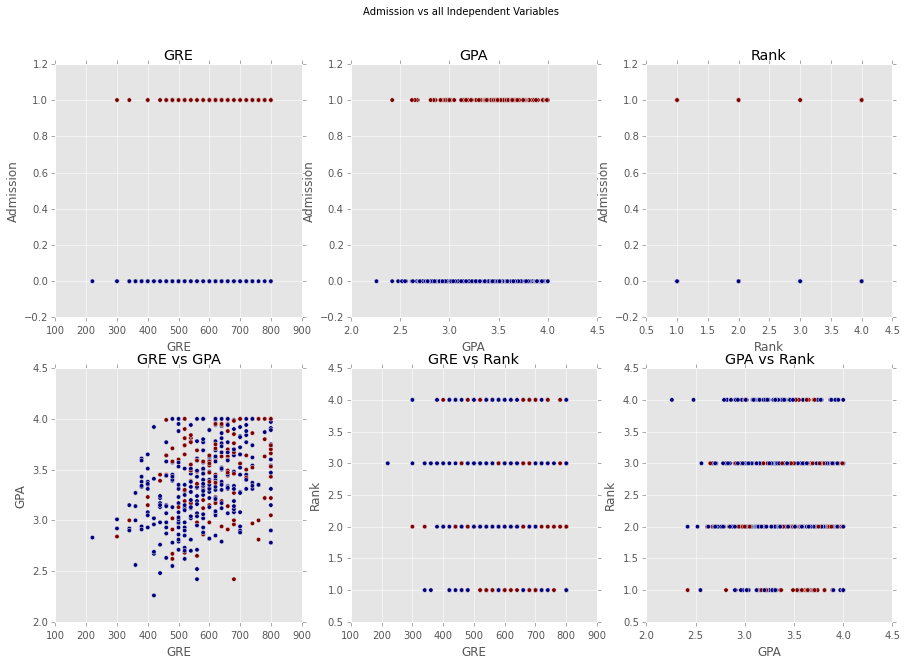

In [3]:
fig, ax = plt.subplots(2,3, sharey=False)
fig.suptitle("Admission vs all Independent Variables")
fig.set_size_inches(15,10)
#Admission vs....
#GRE figure
ax[0,0].scatter(df.gre, df.admit, c=df.admit)
ax[0,0].set_title("GRE")
ax[0,0].set_xlabel("GRE")
ax[0,0].set_ylabel("Admission")
#GPA figure
ax[0, 1].scatter(df.gpa, df.admit, c=df.admit)
ax[0, 1].set_title("GPA")
ax[0, 1].set_xlabel("GPA")
ax[0, 1].set_ylabel("Admission")
#Rank figure
ax[0, 2].scatter(df["rank"], df.admit, c=df.admit)
ax[0, 2].set_title("Rank")
ax[0, 2].set_xlabel("Rank")
ax[0, 2].set_ylabel("Admission")
#Admission as color vs....
#GRE figure
ax[1,0].scatter(df.gre, df.gpa, c=df.admit)
ax[1,0].set_title("GRE vs GPA")
ax[1,0].set_xlabel("GRE")
ax[1,0].set_ylabel("GPA")
#GPA figure
ax[1, 1].scatter(df.gre, df["rank"], c=df.admit)
ax[1, 1].set_title("GRE vs Rank")
ax[1, 1].set_xlabel("GRE")
ax[1, 1].set_ylabel("Rank")
#Rank figure
ax[1, 2].scatter(df.gpa, df["rank"], c=df.admit)
ax[1, 2].set_title("GPA vs Rank")
ax[1, 2].set_xlabel("GPA")
ax[1, 2].set_ylabel("Rank")

fig.show()

<h1>Build the model</h1>
<p>Create train test splits for your data.  Use the training data to .</p>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# get data in np arrays
X = df.as_matrix(columns=["gre", "gpa", "rank"])
y = df.as_matrix(columns=["admit"])

# perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# define and train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h2>Generate classification predictions</h2>
<p>Use the models 'predict' function to create classification output on your test set.  Build a confusion matrix to express the performance of the model.</p>

In [5]:
#taken from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Model accuracy 0.72, f1 score 0.33333333333333337
Confusion matrix, without normalization
[[65  1]
 [27  7]]


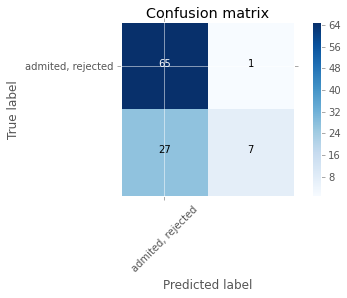

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc
# Create prediction array.
preds = logreg.predict(X_test)

# Use the sklearn confusion matrix class to create a confusion matrix, call the variable "cm"
# so it works with the last line of this cell
cm = confusion_matrix(y_test, preds)

#Print the accuracy_score and f1 score
print("Model accuracy {}, f1 score {}".format(accuracy_score(y_test, preds), f1_score(y_test, preds)))

# Defined in cell above
plot_confusion_matrix(cm, ["admited, rejected"])

<h2>Create ROC Curve</h2>
<p>Use the "predict_proba" method for your model to give probability scores.  Generate and plot a ROC curve for variable thresholds</p>

In [7]:
# Create array of regression scores for both classes using the 'predict_proba' class
probs = logreg.predict_proba(X_test)

# n.b. this class outputs probabilities for both admission and rejection.  
# Create an array of just the admission probabilities
pos_prob = [x[1] for x in probs]

# Use the roc_curve method to create false positive rates, true positive rates
fpr, tpr, thresh = roc_curve(y_test, pos_prob)

# Use these rates to generate an 'area under the curve score', print it
r_auc = auc(fpr, tpr)
print("Area under ROC curve is {}".format(r_auc))

Area under ROC curve is 0.6475044563279856


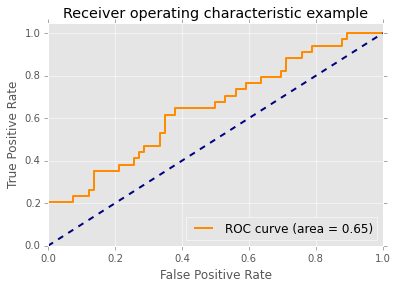

In [8]:
# Plot the ROC curve.
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % r_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<h1>Discussion Prompt</h1>
<p>
P1: How does the model performance match your expectation of how well it should perform?<br/>

P2: The accuracy, f1 score, and AUC all paint different pictures of performance.  Why is this?<br/>

P3: Based on the ROC curve, do you think the default decision boundary of .5 gives you the best performance?
</p>